Question 1: XOR Gate Classification


II. Implementation

Single Layer Perceptron results:
Input: [0 0], Target: 0, Prediction: 1
Input: [0 1], Target: 1, Prediction: 1
Input: [1 0], Target: 1, Prediction: 0
Input: [1 1], Target: 0, Prediction: 0

Multi-Layer Perceptron results:
Input: [0 0], Target: 0, Prediction: 0.0702
Input: [0 1], Target: 1, Prediction: 0.9344
Input: [1 0], Target: 1, Prediction: 0.9343
Input: [1 1], Target: 0, Prediction: 0.0713


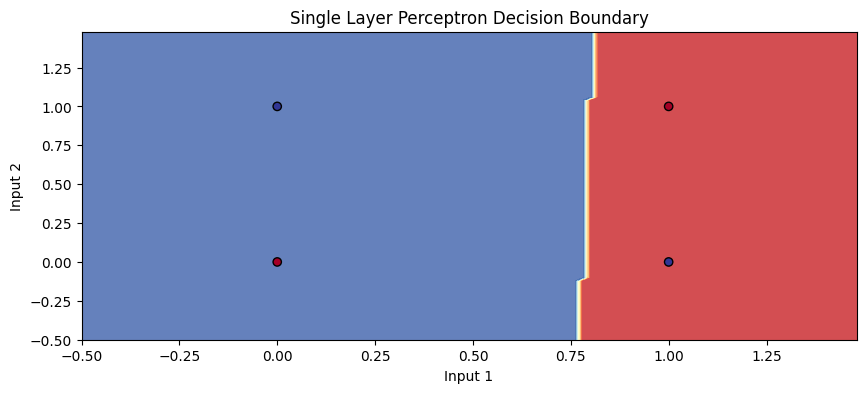

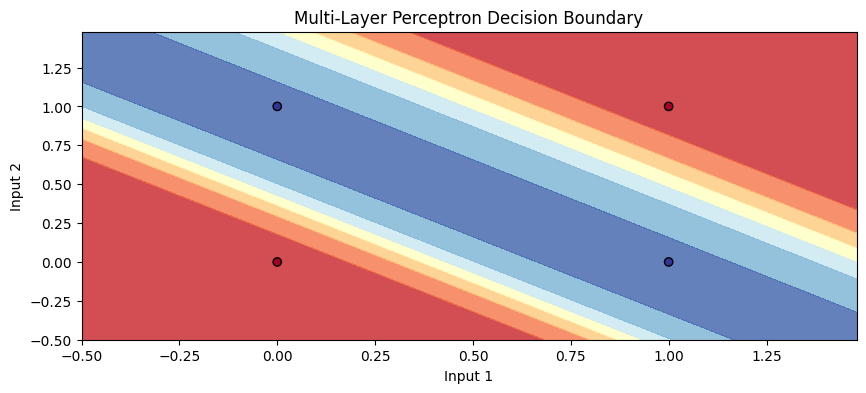

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Single Layer Perceptron
class SingleLayerPerceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def activate(self, x):
        return 1 if np.dot(self.weights, x) + self.bias > 0 else 0

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        for _ in range(epochs):
            for x, target in zip(X, y):
                prediction = self.activate(x)
                error = target - prediction
                self.weights += learning_rate * error * x
                self.bias += learning_rate * error

# Train Single Layer Perceptron
slp = SingleLayerPerceptron(2)
slp.train(X, y)

# Test Single Layer Perceptron
print("Single Layer Perceptron results:")
for x, target in zip(X, y):
    prediction = slp.activate(x)
    print(f"Input: {x}, Target: {target}, Prediction: {prediction}")

# Multi-Layer Perceptron
class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_weights = np.random.rand(input_size, hidden_size)
        self.hidden_bias = np.random.rand(hidden_size)
        self.output_weights = np.random.rand(hidden_size, output_size)
        self.output_bias = np.random.rand(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        self.hidden = self.sigmoid(np.dot(x, self.hidden_weights) + self.hidden_bias)
        self.output = self.sigmoid(np.dot(self.hidden, self.output_weights) + self.output_bias)
        return self.output

    def train(self, X, y, epochs=10000, learning_rate=0.1):
        for _ in range(epochs):
            for x, target in zip(X, y):
                # Forward pass
                self.forward(x)

                # Backward pass
                output_error = target - self.output
                output_delta = output_error * self.sigmoid_derivative(self.output)

                hidden_error = np.dot(output_delta, self.output_weights.T)
                hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden)

                # Update weights and biases
                self.output_weights += learning_rate * np.outer(self.hidden, output_delta)
                self.output_bias += learning_rate * output_delta
                self.hidden_weights += learning_rate * np.outer(x, hidden_delta)
                self.hidden_bias += learning_rate * hidden_delta

# Train Multi-Layer Perceptron
mlp = MultiLayerPerceptron(2, 2, 1)
mlp.train(X, y)

# Test Multi-Layer Perceptron
print("\nMulti-Layer Perceptron results:")
for x, target in zip(X, y):
    prediction = mlp.forward(x)
    print(f"Input: {x}, Target: {target}, Prediction: {prediction[0]:.4f}")

# Visualization
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = np.array([model.activate(np.array([x, y])) if isinstance(model, SingleLayerPerceptron)
                  else model.forward(np.array([x, y]))[0] for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 4))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title(title)
    plt.show()

plot_decision_boundary(slp, X, y, 'Single Layer Perceptron Decision Boundary')
plot_decision_boundary(mlp, X, y, 'Multi-Layer Perceptron Decision Boundary')

#Documentation:

# XOR Problem with Perceptrons

## Table of Contents
1. Import Libraries
2. Define the XOR Truth Table
3. Single Layer Perceptron
4. Multi-Layer Perceptron
5. Training and Testing
6. Visualization

## Import Libraries
Use NumPy for numerical operations and Matplotlib for visualizations.

## Define the XOR Truth Table
Create input features representing binary combinations and their corresponding outputs for the XOR function.

## Single Layer Perceptron
- **Initialization**: Randomly initializes weights and bias.
- **Activation Function**: Implements a step function.
- **Training Method**: Updates weights and bias based on prediction errors over multiple epochs.

## Multi-Layer Perceptron
- **Initialization**: Randomly initializes weights and biases for hidden and output layers.
- **Activation Function**: Uses the sigmoid function.
- **Forward Pass**: Computes outputs from inputs through the network.
- **Training Method**: Implements backpropagation to update weights based on errors.

## Training and Testing
Train both the SLP and MLP on the XOR dataset, then test them by comparing their predictions to the expected outputs.

## Visualization
Define a function to plot decision boundaries for both models, allowing visual comparison of how each perceptron classifies the XOR inputs.

Question 2:

A. Sentiment Analysis Twitter Airline

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

Display the first few rows of the dataframe
       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703061e+17           neutral                        1.0000   
1  5.703011e+17          positive                        0.3486   
2  5.703011e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703008e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN

<ipython-input-12-3e3ab1df0c99>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline_sentiment', palette='viridis')


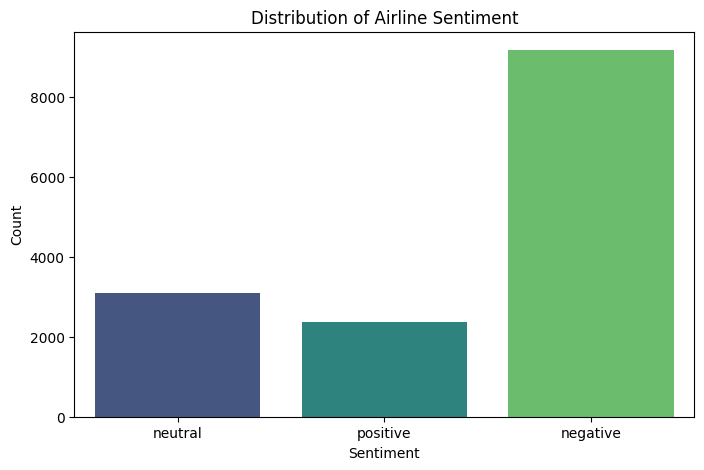

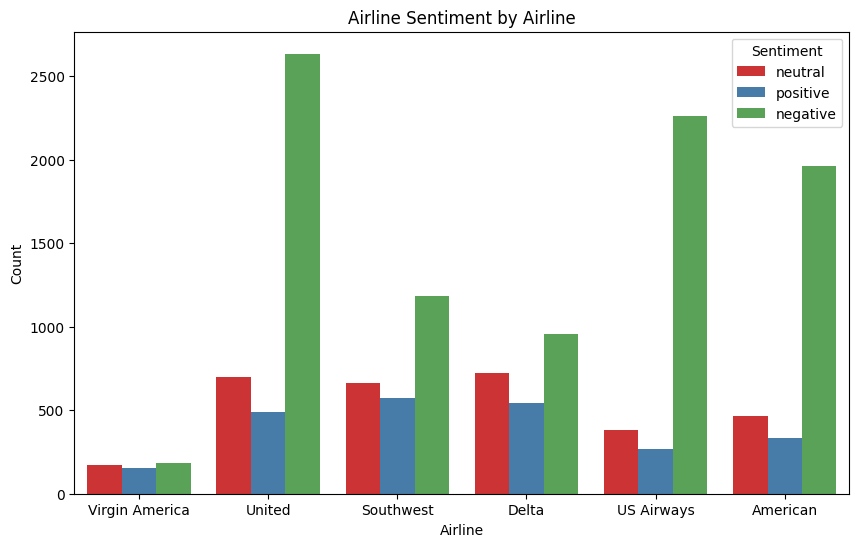

In [12]:
df = pd.read_csv('Tweets.csv')

#EDA
print("Display the first few rows of the dataframe")
print(df.head())

print("Basic statistics of the dataset")
print(df.describe())

print("Check for missing values")
print(df.isnull().sum())

# Visualize the distribution of airline sentiment
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='airline_sentiment', palette='viridis')
plt.title('Distribution of Airline Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualizing sentiment by airline
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='Set1')
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()





In [13]:
# Filter relevant columns
df = df[['text', 'airline_sentiment']]
df = df[df['airline_sentiment'].isin(['positive', 'negative'])]  # Keep only binary sentiments

# Encode labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['airline_sentiment'])

# Vectorize text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()
y = df['sentiment'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Neural Network Model

In [14]:
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Train the Model with Backpropagation

In [15]:
activation_functions = ['sigmoid', 'relu', 'tanh']
history_dict = {}

for activation in activation_functions:
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
    history_dict[activation] = history.history


for activation in activation_functions:
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Activation Function: {activation}, Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9096 - loss: 0.9550
Activation Function: sigmoid, Test Accuracy: 0.9026
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9096 - loss: 0.9550
Activation Function: relu, Test Accuracy: 0.9026
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9096 - loss: 0.9550
Activation Function: tanh, Test Accuracy: 0.9026


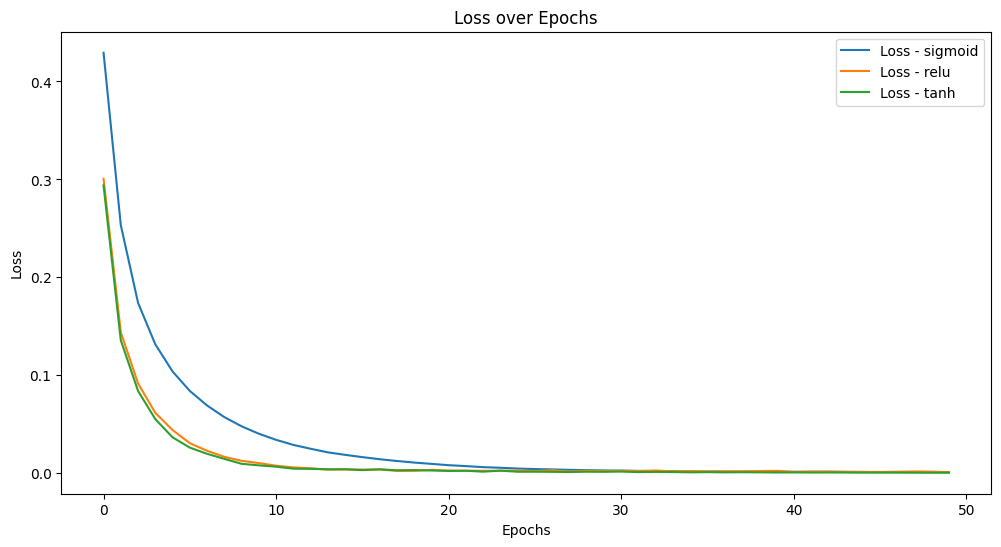

In [16]:
plt.figure(figsize=(12, 6))
for activation in activation_functions:
    plt.plot(history_dict[activation]['loss'], label=f'Loss - {activation}')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Documentation

# Sentiment Analysis of Airline Tweets

## Table of Contents
1. Import Libraries
2. Load Dataset
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing
5. Model Creation and Training
6. Model Evaluation
7. Visualization of Results
## Import Libraries
Utilize libraries such as Seaborn for visualization, Pandas for data manipulation, NumPy for numerical operations, and TensorFlow/Keras for building and training the neural network.

## Load Dataset
Load the dataset containing tweets from airlines using Pandas.

## Exploratory Data Analysis (EDA)
- Display the first few rows of the dataset.
- Generate basic statistics to understand the data distribution.
- Check for missing values to ensure data quality.
- Visualize the distribution of sentiments and sentiments by airline using count plots.

## Data Preprocessing
- Filter relevant columns to focus on text and sentiment.
- Encode categorical labels into numerical values using LabelEncoder.
- Vectorize the text data with CountVectorizer to convert text into numerical format.
- Split the dataset into training and testing sets.

## Model Creation and Training
Define a function to create a neural network model with varying activation functions (sigmoid, ReLU, tanh). Train the model on the training dataset for multiple epochs.

## Model Evaluation
Evaluate the trained models on the test dataset and print their accuracy for each activation function.

## Visualization of Results
Plot the loss over epochs for each activation function to visualize model performance during training.
